# Ajuste por mínimos cuadrados

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/2_Ajuste_de_curvas/2.4_Ajustes_por_minimos_cuadrados.ipynb)

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# Polinomios (grado 3)

In [45]:
def mincua_lineal(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**2), sum(x)],
                      [sum(x), n]])
    vec_b = np.array([[sum(y*x)],
                      [sum(y)]])

    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0]


def mincua_cuadratica(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**4), sum(x**3), sum(x**2)],
                      [sum(x**3), sum(x**2), sum(x)],
                      [sum(x**2), sum(x), n]])
    vec_b = np.array([[sum(y*x**2)],
                      [sum(y*x)],
                      [sum(y)]])

    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0], sol[2][0]

def mincua_cubica(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**6), sum(x**5), sum(x**4), sum(x**3)],
                      [sum(x**5), sum(x**4), sum(x**3), sum(x**2)],
                      [sum(x**4), sum(x**3), sum(x**2), sum(x)],
                      [sum(x**3), sum(x**2), sum(x), n]])
    vec_b = np.array([[sum(y*x**3)],
                      [sum(y*x**2)],
                      [sum(y*x)],
                      [sum(y)]])

    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0], sol[2][0], sol[3][0]

In [80]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_1, a_0 = mincua_lineal(datos_x, datos_y)
print(f'La ecuación de la recta es:\n'
      f'{a_1:.2f}*x + {a_0:.2f}')

La ecuación de la recta es:
1.42*x + 5.30


In [82]:
f = lambda x: a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9620301131407123

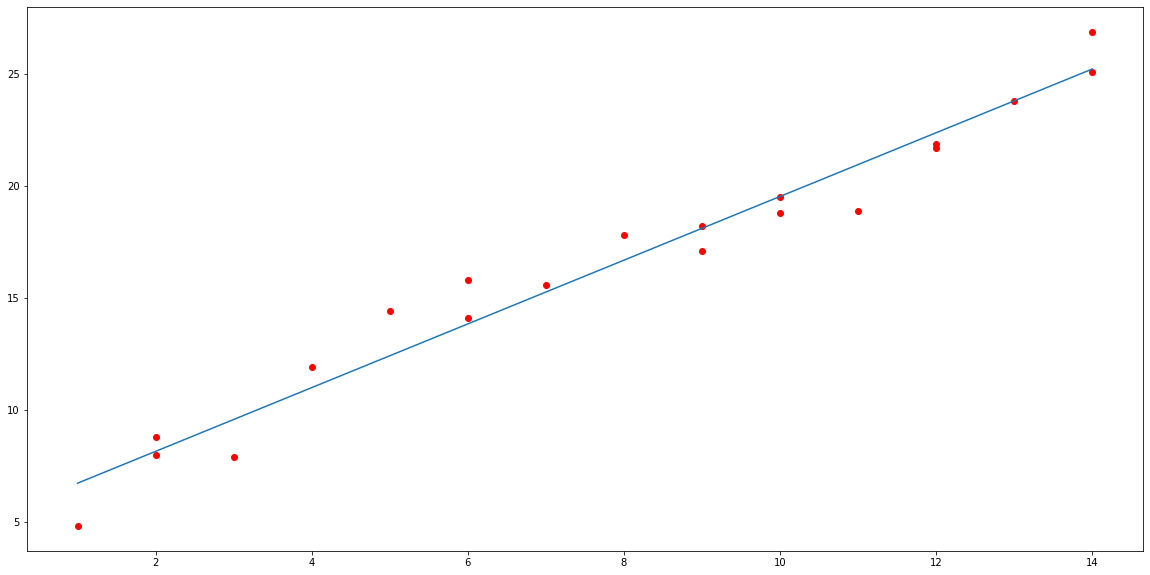

In [36]:
f = lambda x: a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')

In [83]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_2, a_1, a_0 = mincua_cuadratica(datos_x, datos_y)
print(f'La ecuación de la cuadrática es:\n'
      f'{a_2:.2f}*x^2 + {a_1:.2f}*x + {a_0:.2f}')

La ecuación de la cuadrática es:
-0.01*x^2 + 1.65*x + 4.68


In [84]:
f = lambda x: a_2*x**2 + a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9633818836372199

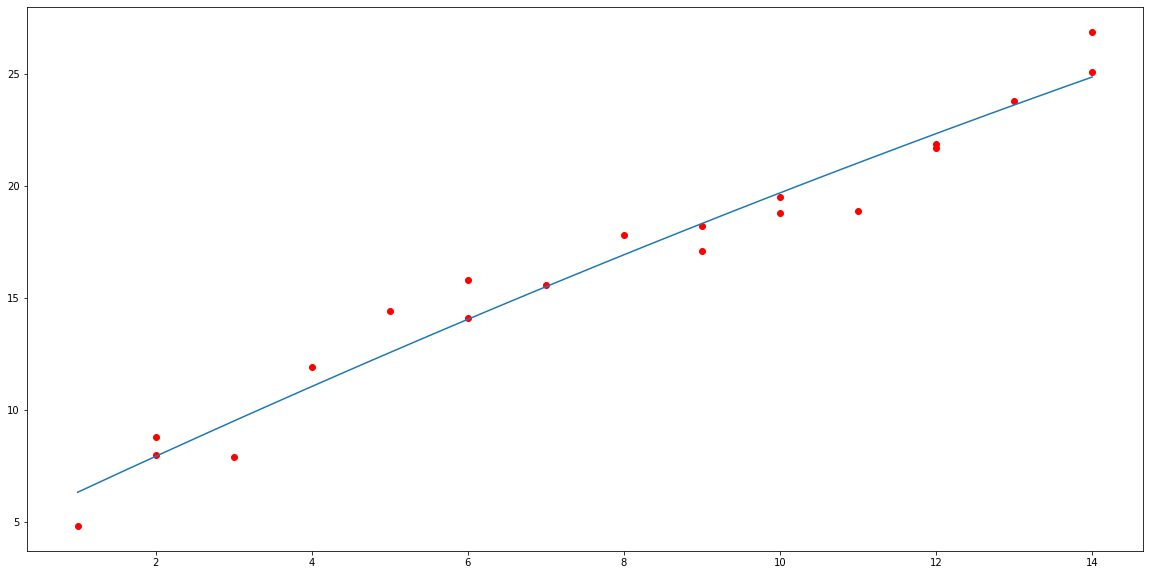

In [41]:
f = lambda x: a_2*x**2 + a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')

In [85]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_3, a_2, a_1, a_0 = mincua_cubica(datos_x, datos_y)
print(f'La ecuación de la cúbica es:\n'
      f'{a_3:.3f}*x^3 + {a_2:.3f}*x^2 + {a_1:.3f}*x + {a_0:.3f}')

La ecuación de la cúbica es:
0.015*x^3 + -0.372*x^2 + 3.946*x + 1.211


In [86]:
f = lambda x: a_3*x**3 + a_2*x**2 + a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9803454953413482

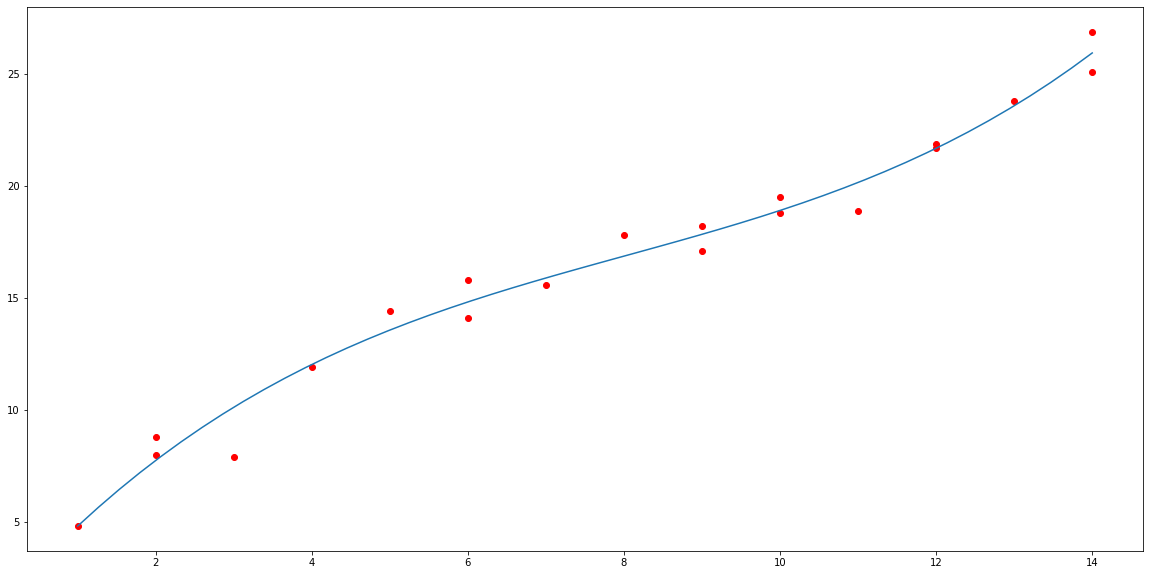

In [48]:
f = lambda x: a_3*x**3 + a_2*x**2 + a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')